# Scratch Assay - Wound Healing Analysis

## Raw Data (Unit: μm)

**Normal group:**
- day1: 1.84 1.84 1.83 1.85 1.84
- day2: 1.08 1.10 1.14 1.25 0.83
- day3: 0.61 0.86 0.72 0.76 0.52
- day4: 0.00 
- day5: 0.00

**Old group:**
- day1: 1.85 1.84 1.84 1.85 1.94
- day2: 1.57 1.02 1.49 1.25 1.19
- day3: 1.07 0.92 0.88 0.94 1.06
- day4: 0.89 0.84 0.72 0.63 0.58
- day5: 0.54 0.53 0.44 0.35 0.47

**Older group**
- 2.16 2,12 1.79 1.94 2.16
- 1.94 1.61 2.13 1.95 1.95
-1.51 1.51  1.46 1.80 0.87
- 1.48 1.20 1.46 1.42 0.98
- 1.43 1.29 1.31  1.67 0.98

Reference: 500μm = 0.77

## Analysis

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Parse the data
normal_data = {
    'day1': [1.84, 1.84, 1.83, 1.85, 1.84],
    'day2': [1.08, 1.10, 1.14, 1.25, 0.83],
    'day3': [0.61, 0.86, 0.72, 0.76, 0.52],
    'day4': [0.00],
    'day5': [0.00]
}

old_data = {
    'day1': [1.85, 1.84, 1.84, 1.85, 1.94],
    'day2': [1.57, 1.02, 1.49, 1.25, 1.19],
    'day3': [1.07, 0.92, 0.88, 0.94, 1.06],
    'day4': [0.89, 0.84, 0.72, 0.63, 0.58],
    'day5': [0.54, 0.53, 0.44, 0.35, 0.47]
}

older_data = {
    'day1': [2.16, 2.12, 1.79, 1.94, 2.16],
    'day2': [1.94, 1.61, 2.13, 1.95, 1.95],
    'day3': [1.51, 1.51, 1.46, 1.80, 0.87],
    'day4': [1.48, 1.20, 1.46, 1.42, 0.98],
    'day5': [1.43, 1.29, 1.31, 1.67, 0.98]
}

# Conversion factor: 500μm = 0.77 (measured value)
conversion_factor = 500 / 0.77  # μm per unit

# Calculate mean and std for each day (in original units)
days = [1, 2, 3, 4, 5]
# Convert days to hours for plotting (Day 1 = 0h, Day 5 = 48h, 12h per day)
hours = [0, 12, 24, 36, 48]
normal_means_raw = [np.mean(normal_data[f'day{i}']) for i in days]
normal_stds_raw = [np.std(normal_data[f'day{i}'], ddof=1) if len(normal_data[f'day{i}']) > 1 else 0 for i in days]

old_means_raw = [np.mean(old_data[f'day{i}']) for i in days]
old_stds_raw = [np.std(old_data[f'day{i}'], ddof=1) if len(old_data[f'day{i}']) > 1 else 0 for i in days]

older_means_raw = [np.mean(older_data[f'day{i}']) for i in days]
older_stds_raw = [np.std(older_data[f'day{i}'], ddof=1) if len(older_data[f'day{i}']) > 1 else 0 for i in days]

# Convert to micrometers (μm)
normal_means = [x * conversion_factor for x in normal_means_raw]
normal_stds = [x * conversion_factor for x in normal_stds_raw]

old_means = [x * conversion_factor for x in old_means_raw]
old_stds = [x * conversion_factor for x in old_stds_raw]

older_means = [x * conversion_factor for x in older_means_raw]
older_stds = [x * conversion_factor for x in older_stds_raw]

print("Mean scratch width over time:")
print("\nNormal group:")
for i, day in enumerate(days):
    print(f"  Day {day}: {normal_means[i]:.3f} ± {normal_stds[i]:.3f}")

print("\nOld group:")
for i, day in enumerate(days):
    print(f"  Day {day}: {old_means[i]:.3f} ± {old_stds[i]:.3f}")

print("\nOlder group:")
for i, day in enumerate(days):
    print(f"  Day {day}: {older_means[i]:.3f} ± {older_stds[i]:.3f}")


Mean scratch width over time:

Normal group:
  Day 1: 1194.805 ± 4.592
  Day 2: 701.299 ± 100.282
  Day 3: 450.649 ± 85.852
  Day 4: 0.000 ± 0.000
  Day 5: 0.000 ± 0.000

Old group:
  Day 1: 1210.390 ± 27.778
  Day 2: 846.753 ± 145.895
  Day 3: 632.468 ± 55.784
  Day 4: 475.325 ± 86.073
  Day 5: 302.597 ± 50.004

Older group:
  Day 1: 1320.779 ± 106.462
  Day 2: 1244.156 ± 122.485
  Day 3: 928.571 ± 221.209
  Day 4: 849.351 ± 139.452
  Day 5: 867.532 ± 162.312


In [17]:
# Calculate migration speed (closure rate)
# Speed = (initial width - final width) / time
# Using linear regression to estimate the overall migration rate

# Fit linear regression for each group
normal_slope, normal_intercept, normal_r, normal_p, normal_se = stats.linregress(days, normal_means)
old_slope, old_intercept, old_r, old_p, old_se = stats.linregress(days, old_means)
older_slope, older_intercept, older_r, older_p, older_se = stats.linregress(days, older_means)

# Migration speed is the absolute value of the slope (width decrease per day)
normal_speed = abs(normal_slope)
old_speed = abs(old_slope)
older_speed = abs(older_slope)

# Calculate speed ratios
speed_ratio_normal_to_old = normal_speed / old_speed
speed_ratio_normal_to_older = normal_speed / older_speed
speed_ratio_old_to_older = old_speed / older_speed

print("\n" + "="*70)
print("Migration Speed Analysis:")
print("="*70)
print(f"\nNormal group migration speed: {normal_speed:.4f} μm/day")
print(f"  R² = {normal_r**2:.4f}, p-value = {normal_p:.4e}")
print(f"\nOld group migration speed: {old_speed:.4f} μm/day")
print(f"  R² = {old_r**2:.4f}, p-value = {old_p:.4e}")
print(f"\nOlder group migration speed: {older_speed:.4f} μm/day")
print(f"  R² = {older_r**2:.4f}, p-value = {older_p:.4e}")
print(f"\n{'='*70}")
print("Speed Ratios:")
print(f"  Normal/Old: {speed_ratio_normal_to_old:.4f} (Normal is {speed_ratio_normal_to_old:.2f}x faster)")
print(f"  Normal/Older: {speed_ratio_normal_to_older:.4f} (Normal is {speed_ratio_normal_to_older:.2f}x faster)")
print(f"  Old/Older: {speed_ratio_old_to_older:.4f} (Old is {speed_ratio_old_to_older:.2f}x faster)")
print(f"{'='*70}")


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Migration Speed Analysis:

Normal group migration speed: 309.0909 μm/day
  R² = 0.9357, p-value = 7.0568e-03

Old group migration speed: 218.7013 μm/day
  R² = 0.9667, p-value = 2.6083e-03

Older group migration speed: 130.1299 μm/day
  R² = 0.8509, 

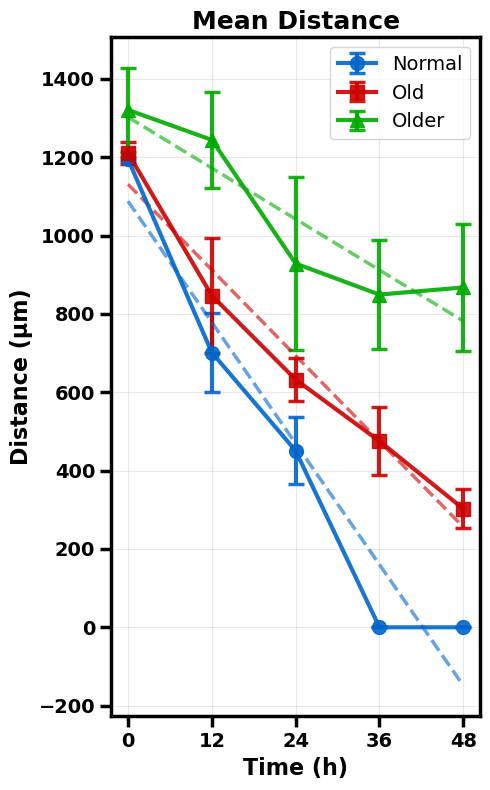


Figure saved as 'scratch_assay_analysis.png'


In [18]:
# Create visualization
fig, ax = plt.subplots(figsize=(5, 8))

# Plot: Scratch width over time with error bars (using hours)
ax.errorbar(hours, normal_means, yerr=normal_stds, marker='o', linestyle='-', 
            linewidth=3, markersize=10, capsize=6, capthick=2.5, 
            label='Normal', color='#0066CC', alpha=0.9)
ax.errorbar(hours, old_means, yerr=old_stds, marker='s', linestyle='-', 
            linewidth=3, markersize=10, capsize=6, capthick=2.5, 
            label='Old', color='#CC0000', alpha=0.9)
ax.errorbar(hours, older_means, yerr=older_stds, marker='^', linestyle='-', 
            linewidth=3, markersize=10, capsize=6, capthick=2.5, 
            label='Older', color='#00AA00', alpha=0.9)

# Add regression lines (convert to hours scale)
fit_hours = np.linspace(0, 48, 100)
normal_fit = normal_slope * (fit_hours / 12 + 1) + normal_intercept
old_fit = old_slope * (fit_hours / 12 + 1) + old_intercept
older_fit = older_slope * (fit_hours / 12 + 1) + older_intercept
ax.plot(fit_hours, normal_fit, '--', color='#0066CC', alpha=0.6, linewidth=2.5)
ax.plot(fit_hours, old_fit, '--', color='#CC0000', alpha=0.6, linewidth=2.5)
ax.plot(fit_hours, older_fit, '--', color='#00AA00', alpha=0.6, linewidth=2.5)

ax.set_xlabel('Time (h)', fontsize=16, fontweight='bold')
ax.set_ylabel('Distance (μm)', fontsize=16, fontweight='bold')
ax.set_title('Mean Distance', fontsize=18, fontweight='bold')
ax.legend(fontsize=14, frameon=True, shadow=False, loc='best')
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.8)
ax.set_xticks([0, 12, 24, 36, 48])
ax.tick_params(axis='both', which='major', labelsize=14, width=2.5, length=8)

# Make tick labels bold
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')

# Make border thicker
for spine in ax.spines.values():
    spine.set_linewidth(2.5)

plt.tight_layout()
plt.savefig('scratch_assay_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nFigure saved as 'scratch_assay_analysis.png'")
